### MNIST digit classification dataset
There are 28x28 pixels images that we have to classify in ten classes:digit 0 to 9


_In this notebook we will implement MLP to get an idea about __Backpropagation__ and then in next notebooks understand that deeply_


_This notebook is not for better model, but better understanding only_

In [46]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

_Load dataset:_

In [ ]:
(X_train,y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

In [9]:
print("X_Train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_Train shape:  (60000, 28, 28)
X_test shape:  (10000, 28, 28)


_Note_ : In traditional ML, we used to flattend these array to (60000,784) before giving to model, but here, the model will do it itself

_Visualize a bit:_

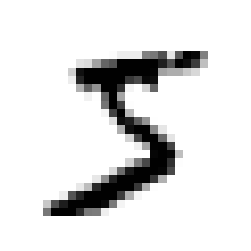

In [24]:
def plot_image(array):
    plt.figure(figsize=(4,3))
    plt.axis(False)
    plt.imshow(array,cmap='binary')

plot_image(X_train[0])

_Scale the datasets_

In [41]:
print("Minimum value:", X_train[0].reshape(784,1).min())
print("Max value:", X_train[0].reshape(784,1).max())

print("So we have to scale these inputs")

Minimum value: 0
Max value: 255
So we have to scale these inputs


We can use StandardScalar or →  Since we want values between 0-1, we can divide values by 255

In [42]:
X_train = X_train/255.0
X_test = X_test/255.0

In [43]:
print("Minimum value:", X_train[0].reshape(784,1).min())
print("Max value:", X_train[0].reshape(784,1).max())

Minimum value: 0.0
Max value: 1.0


_Create the model:_

In [64]:
from tensorflow.keras.layers import Flatten

model = Sequential()

model.add(Input(shape=X_train[0].shape))   # Input layer
model.add(Flatten())                       # Flattens input: 28x28=784

model.add(Dense(98, activation='relu'))
model.add(Dense(49, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 98)             │        76,930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 49)             │         4,851 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,281 (321.41 KB)

 Trainable params: 82,281 (321.41 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
print("Parameters:", 784*98 + 98 + 98*49 + 49 + 49*10 + 10)

Parameters: 82281


In [65]:
model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='Adam', 
    metrics=['Accuracy'])

In [66]:
history = model.fit(X_train,y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - Accuracy: 0.9175 - loss: 0.2874 - val_Accuracy: 0.9548 - val_loss: 0.1475
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - Accuracy: 0.9624 - loss: 0.1234 - val_Accuracy: 0.9628 - val_loss: 0.1228
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Accuracy: 0.9734 - loss: 0.0872 - val_Accuracy: 0.9618 - val_loss: 0.1192
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - Accuracy: 0.9799 - loss: 0.0653 - val_Accuracy: 0.9718 - val_loss: 0.0968
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Accuracy: 0.9835 - loss: 0.0518 - val_Accuracy: 0.9707 - val_loss: 0.1002
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Accuracy: 0.9867 - loss: 0.0414 - val_Accuracy: 0.9727 - val_loss: 0.0983
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Accuracy: 0.9890 - loss: 0.0351 - val_Accuracy: 0.9716 - val_loss: 0.1055
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Accuracy: 0.9901 - loss: 0.0300 - 

_Plot graphs:_

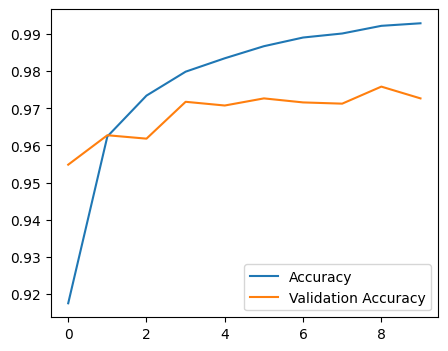

In [69]:
plt.figure(figsize=(5,4))
plt.plot(history.history['Accuracy'],label='Accuracy')
plt.plot(history.history['val_Accuracy'], label='Validation Accuracy')
plt.legend()

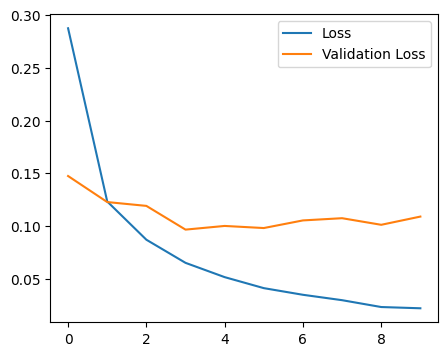

In [70]:
plt.figure(figsize=(5,4))
plt.plot(history.history['loss'],label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

_Predict outputs:_

In [73]:
y_pred_probs = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [74]:
y_pred_probs[0]

array([4.0828122e-11, 9.3843391e-11, 6.7214607e-08, 2.5880098e-08,
       5.4510118e-14, 2.0639454e-10, 6.5297948e-18, 9.9999988e-01,
       1.5160435e-10, 2.2506967e-10], dtype=float32)

There are 10 probabilities,one for each class, and to classify we need to take one with higest probability

In [76]:
y_pred = np.argmax(y_pred_probs, axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6], shape=(10000,))

In [80]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
print("accuracy: ",accuracy_score(y_test, y_pred))
print("Recall: ",recall_score(y_test, y_pred,average='weighted'))
print("Precision: ",precision_score(y_test, y_pred,average='weighted'))

accuracy:  0.9762
Recall:  0.9762
Precision:  0.9762971680414914


# HELL YEAHH BITCH LESSGO